### eBay - soccer

In [2]:
import pandas as pd
import numpy as np

df_soccer = pd.read_csv("data/soccer_jerseys.csv")

#add discount flag
df_soccer['discount_flag'] = (~df_soccer['marketingPrice.discountPercentage'].isna()) \
                                    & (df_soccer['marketingPrice.discountPercentage'] != "")

#more cleaning
df_soccer["conditionId"] = df_soccer["conditionId"].dropna().astype(int).astype(str)
df_soccer["conditionId"] = df_soccer["conditionId"].reindex(df_soccer.index).fillna("Unspecified")
df_soccer['condition_desc'] = df_soccer['conditionId'].astype(str) + " - " + df_soccer['condition']
df_soccer["shipping_cost"] = df_soccer["shipping_cost"].fillna(0)
df_soccer["top_club"] = df_soccer["club"].notna() & (df_soccer["club"].str.strip() != "")
df_soccer["top_country"] = df_soccer["country"].notna() & (df_soccer["country"].str.strip() != "")
df_soccer.loc[df_soccer["year"] < 1970, "year"] = np.nan  #fix some strange behavior from the year calc field
df_soccer.loc[df_soccer["year"] > 2026, "year"] = np.nan
df_soccer["Messi"] = df_soccer["title"].str.lower().str.contains("messi").fillna(False)

#summary
avg_prices = df_soccer.groupby('condition_desc')['price.value'].mean().reset_index(name='mean_price')
counts = df_soccer.groupby('condition_desc')['price.value'].count().reset_index(name='counts')
condition_summary = pd.merge(avg_prices, counts, on='condition_desc')
print(condition_summary)

df_soccer.to_csv("data/soccer_new.csv", index=False)

              condition_desc  mean_price  counts
0                 1000 - New   51.145087     806
1       1000 - New with tags   45.875741      54
2    1500 - New without tags   35.312000       5
3           3000 - Pre-owned   48.000000       1
4                3000 - Used   49.329550     111
5  Unspecified - Unspecified   53.342609      23


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import decomposition
import seaborn as sns

features = df_soccer[["seller.feedbackPercentage", "seller.feedbackScore", 
                    "days_listed", "shipping_cost", "seller_item_count",
                    "additional_image_count", "title_length"]].fillna(0)

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

pca = decomposition.PCA(n_components=7)  
pca.fit(features_scaled)

print("Scores (for plotting)")
scores = pca.transform(features_scaled)
scores_df = pd.DataFrame(scores, columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7"])
print(scores_df.head(), "\n")

print("Loadings (Soccer)")
loadings = pca.components_.T
loadings_df = pd.DataFrame(loadings, columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7"])
loadings_df.index = features.columns
print(loadings_df)

explained_var = pca.explained_variance_ratio_
print("\n", explained_var)


Scores (for plotting)
        PC1       PC2       PC3       PC4       PC5       PC6       PC7
0 -1.502898  2.245748  1.283774  1.061454  0.077886  0.910152  0.750480
1 -1.527475  0.562284 -0.073840  0.172750 -0.388742 -0.595848 -0.128347
2 -1.039942  2.331348  1.375564  1.062498  0.072994  1.024995  0.640244
3 -0.385103  0.871177  0.188725  0.501318 -0.010819 -0.101279  0.078250
4 -0.732158  0.752135  0.127108  0.162534 -0.412177 -0.348891 -0.465478 

Loadings (Soccer)
                                PC1       PC2       PC3       PC4       PC5  \
seller.feedbackPercentage  0.010049 -0.150962  0.755882 -0.133446 -0.384789   
seller.feedbackScore      -0.008924 -0.442394 -0.038309  0.600598 -0.561366   
days_listed                0.063542 -0.465665  0.267488  0.415040  0.711519   
shipping_cost             -0.057127 -0.478420  0.206796 -0.595509  0.092009   
seller_item_count         -0.202771  0.526884  0.476615  0.305263  0.145203   
additional_image_count     0.649322  0.233197  0.265

In [4]:
features.shape

(1000, 7)

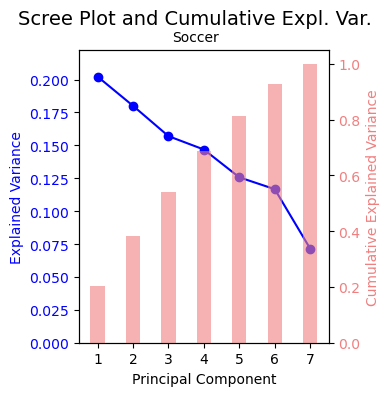

In [5]:
#Overlay scree plot and cumulative variance by component
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)
components = np.arange(1, len(explained_var)+1) 

fig, ax1 = plt.subplots(figsize=(4, 4))
#screen plot
ax1.plot(components, explained_var, color='blue', marker='o', label='Scree (Individual Variance)')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(components)
ax1.set_xticklabels(components)
ax1.set_ylim(0, max(explained_var)*1.1)

#cumulative variance
ax2 = ax1.twinx()
ax2.bar(components, cumulative_var, width=0.4, color='lightcoral', alpha=0.6, label='Cumulative Variance')
ax2.set_ylabel('Cumulative Explained Variance', color='lightcoral')
ax2.tick_params(axis='y', labelcolor='lightcoral')
ax2.set_ylim(0, 1.05)
fig.suptitle("Scree Plot and Cumulative Expl. Var.", fontsize=14)
fig.text(0.5, 0.90, "Soccer", ha='center', fontsize=10)
plt.tight_layout()
plt.savefig("images/2/scree_soccer.png", dpi=300, bbox_inches='tight', facecolor="#E7E7E7")
plt.show()

### iPhone (added later)

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import decomposition
import seaborn as sns

df_iphone = pd.read_csv("data/iphone_kmc.csv")

features_iphone = df_iphone[["seller.feedbackPercentage", "seller.feedbackScore", 
                    "days_listed", "shipping_cost", "seller_item_count",
                    "additional_image_count", "title_length"]].fillna(0)

scaler = StandardScaler()
features_scaled_iphone = scaler.fit_transform(features_iphone)

pca = decomposition.PCA(n_components=7)  
pca.fit(features_scaled_iphone)

print("Scores (for plotting)")
scores = pca.transform(features_scaled_iphone)
scores_df = pd.DataFrame(scores, columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7"])
print(scores_df.head(), "\n")

print("Loadings (iPhone)")
loadings = pca.components_.T
loadings_df = pd.DataFrame(loadings, columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7"])
loadings_df.index = features_iphone.columns
print(loadings_df)

explained_var = pca.explained_variance_ratio_
print("\n", explained_var)

Scores (for plotting)
        PC1       PC2       PC3       PC4       PC5       PC6       PC7
0  0.052661 -0.778299 -0.423946  0.149906 -0.442643 -0.762406 -0.821172
1 -1.165516  0.367595 -0.534396  0.155429 -0.579123 -0.275775  0.120225
2  1.193653  0.863191  0.020029 -0.216528 -0.786664  0.861082  0.240753
3  0.781779  0.063069  0.330256 -1.005284  0.956748 -0.692829 -0.950492
4  0.282999 -0.310433 -0.164111 -0.328725 -0.053125 -0.640132 -0.763577 

Loadings (iPhone)
                                PC1       PC2       PC3       PC4       PC5  \
seller.feedbackPercentage  0.202448  0.624212 -0.018754  0.506330 -0.042704   
seller.feedbackScore       0.560745 -0.178160  0.107261  0.346927  0.104735   
days_listed                0.346338  0.178541  0.334647 -0.424317  0.722248   
shipping_cost             -0.170914 -0.080736  0.929296  0.080386 -0.293427   
seller_item_count          0.560541 -0.005268  0.048229  0.135323 -0.280217   
additional_image_count    -0.424102  0.171877  0.091

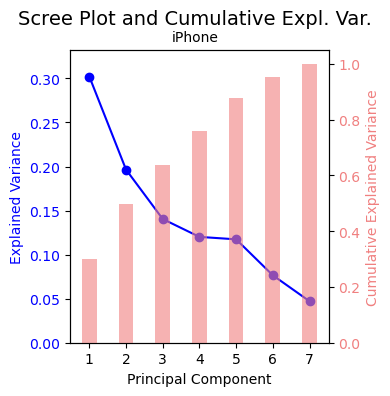

In [7]:
#Overlay scree plot and cumulative variance by component
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)
components = np.arange(1, len(explained_var)+1) 

fig, ax1 = plt.subplots(figsize=(4, 4))
#scree plot
ax1.plot(components, explained_var, color='blue', marker='o', label='Scree (Individual Variance)')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(components)
ax1.set_xticklabels(components)
ax1.set_ylim(0, max(explained_var)*1.1)

#cumulative variance
ax2 = ax1.twinx()
ax2.bar(components, cumulative_var, width=0.4, color='lightcoral', alpha=0.6, label='Cumulative Variance')
ax2.set_ylabel('Cumulative Explained Variance', color='lightcoral')
ax2.tick_params(axis='y', labelcolor='lightcoral')
ax2.set_ylim(0, 1.05)
fig.suptitle("Scree Plot and Cumulative Expl. Var.", fontsize=14)
fig.text(0.5, 0.90, "iPhone", ha='center', fontsize=10)
plt.tight_layout()
plt.savefig("images/2/scree_iphone.png", dpi=300, bbox_inches='tight', facecolor="#E7E7E7")
plt.show()

### Amazon - Lego

In [8]:
#load data and additional clean
df_lego = pd.read_csv("data/lego.csv")
df_lego['sponsored'] = df_lego['sponsored'].fillna(False)
df_lego['has_coupon'] = df_lego['coupon'].notna()
df_lego['price_list_price'] = df_lego['price_list_price'].str.replace("[$,]", "", regex=True).astype(float)
df_lego['stock_info'] = df_lego['stock_info'].fillna("None")
df_lego['age_rec'] = df_lego['age_rec'].fillna("None")
df_lego["top_theme"] = df_lego["lego_theme"] != "Other"
df_lego["rating"] = df_lego["rating"].fillna(0)
df_lego["ratings_total"] = df_lego["ratings_total"].fillna(0)
df_lego.loc[df_lego["price_list_price"] < df_lego["price_value"], "price_list_price"] = np.nan
df_lego["discount$"] = round(df_lego["price_list_price"] - df_lego["price_value"], 2)
df_lego["discount%"] = round(df_lego["discount$"] / df_lego["price_list_price"], 2)
df_lego["discount$"] = df_lego["discount$"].fillna(0)
df_lego["discount%"] = df_lego["discount%"].fillna(0)
df_lego = df_lego[df_lego["title"].str.contains("Lego", case=False, na=False)]

df_lego_filt = df_lego[df_lego["recent_sales_num"].notna()]

df_lego.to_csv("data/lego_new.csv", index=False)


/var/folders/vg/bxzl7hss0gs1hqxsc9zj92l80000gn/T/ipykernel_3601/2644281449.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_lego['sponsored'] = df_lego['sponsored'].fillna(False)


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import decomposition
import seaborn as sns

features_l = df_lego_filt[["rating", "ratings_total", "recent_sales_num", 
                           "discount$", "discount%"]].fillna(0)

scaler = StandardScaler()
features_l_scaled = scaler.fit_transform(features_l)

pca = decomposition.PCA(n_components=5)  
pca.fit(features_l_scaled)

print("Scores (for plotting)")
scores = pca.transform(features_l_scaled)
scores_df = pd.DataFrame(scores, columns=["PC1", "PC2", "PC3", "PC4", "PC5"])
print(scores_df.head(), "\n")

print("Loadings")
loadings = pca.components_.T
loadings_df = pd.DataFrame(loadings, columns=["PC1", "PC2", "PC3", "PC4", "PC5"])
loadings_df.index = features_l.columns
print(loadings_df)

explained_var = pca.explained_variance_ratio_
print("\n", explained_var)

Scores (for plotting)
        PC1       PC2       PC3       PC4       PC5
0 -1.336481 -0.306922  0.179208 -0.096983 -0.270504
1 -1.685199 -0.213258 -0.759652 -0.189780 -0.145682
2 -1.420525 -0.118003  0.333858 -0.318942 -0.258225
3  0.721532 -0.429097  0.191738  1.705763 -1.110159
4  7.009425 -1.934912 -1.076086  0.842468 -1.151784 

Loadings
                       PC1       PC2       PC3       PC4       PC5
rating            0.199781  0.127472  0.953426 -0.163036 -0.090751
ratings_total     0.480981 -0.432804 -0.186825 -0.679348 -0.291412
recent_sales_num  0.424513 -0.576303  0.095592  0.684446 -0.100297
discount$         0.442214  0.635267 -0.196385  0.205123 -0.565898
discount%         0.594122  0.246461 -0.091485 -0.036928  0.759304

 [0.39617292 0.20965708 0.19463687 0.12038883 0.07914431]


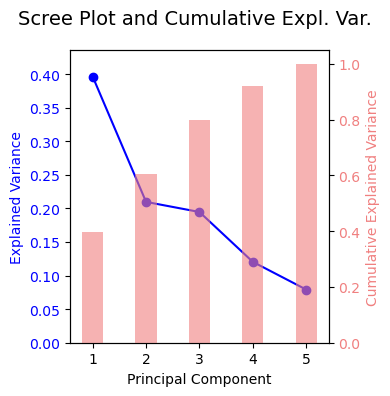

In [10]:
#Overlay scree plot and cumulative variance by component
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)
components = np.arange(1, len(explained_var)+1) 

fig, ax1 = plt.subplots(figsize=(4, 4))
#screen plot
ax1.plot(components, explained_var, color='blue', marker='o', label='Scree (Individual Variance)')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(components)
ax1.set_xticklabels(components)
ax1.set_ylim(0, max(explained_var)*1.1)

#cumulative variance
ax2 = ax1.twinx()
ax2.bar(components, cumulative_var, width=0.4, color='lightcoral', alpha=0.6, label='Cumulative Variance')
ax2.set_ylabel('Cumulative Explained Variance', color='lightcoral')
ax2.tick_params(axis='y', labelcolor='lightcoral')
ax2.set_ylim(0, 1.05)
fig.suptitle("Scree Plot and Cumulative Expl. Var.", fontsize=14)
plt.tight_layout()
plt.savefig("images/2/scree_lego.png", dpi=300, bbox_inches='tight')
plt.show()

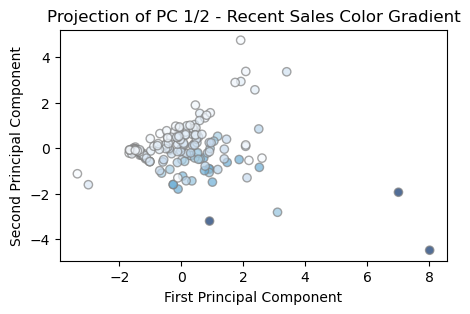

In [11]:
plt.figure(figsize=(5, 3))  
plt.scatter(scores_df["PC1"], scores_df["PC2"], c=df_lego_filt["recent_sales_num"], cmap="Blues", edgecolors="gray", alpha=0.7)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.title("Projection of PC 1/2 - Recent Sales Color Gradient")
plt.savefig("images/2/proj_lego.png", dpi=300, bbox_inches='tight')
plt.show()

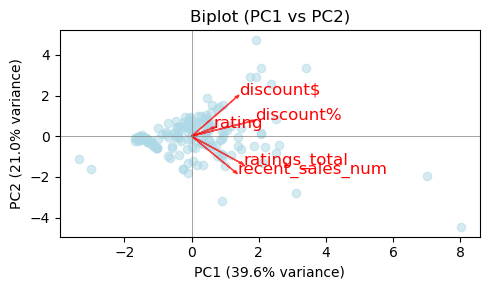

In [12]:
#biplot
plt.figure(figsize=(5, 3))

#scatter plot of scores
plt.scatter(scores_df["PC1"], scores_df["PC2"], alpha=0.5, color='lightblue')

#loadings with arrows
for i, feature in enumerate(features_l.columns):
    plt.arrow(0, 0, 
              loadings[i, 0]*3, loadings[i, 1]*3,  
              color='red', alpha=0.7, head_width=0.1)
    plt.text(loadings[i, 0]*3.2, loadings[i, 1]*3.2, feature, color='red', fontsize=12)

plt.xlabel(f"PC1 ({explained_var[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({explained_var[1]*100:.1f}% variance)")
plt.title("Biplot (PC1 vs PC2)")
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.tight_layout()
plt.savefig("images/2/biplot_lego.png", dpi=300, bbox_inches='tight')
plt.show()